# Test ERA5 dowload

1. Go to https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5
2. Search `ERA5 monthly averaged data on single levels from 1979 to present`
3. Download:
    - Product type: Monthly averaged reanalysis
    - Variable: 2m temperature
    - Select all years (except 2021) / months / time
    - Geographical area: Whole available region
    - Format: NetCDF (experimental)
4. Login/register to submit request (create an account if you don't have one)
5. Go back down on the page and click on Submit Form
6. Click on download, cancel, then right click on the download button and copy the link path, then paste it on the cell bellow besides the `wget` command

Remark: It should be around 1Go

In [1]:
!wget https://download-0001.copernicus-climate.eu/cache-compute-0001/cache/data8/adaptor.mars.internal-1637572848.1746874-13151-12-5e1d897e-06ad-4bcd-acc1-9210291b4135.nc

--2021-11-22 09:34:22--  https://download-0014.copernicus-climate.eu/cache-compute-0014/cache/data6/adaptor.mars.internal-1637399148.7146387-18987-8-3fe67438-1c5a-496a-8750-eaef881e13e3.nc
Résolution de download-0014.copernicus-climate.eu (download-0014.copernicus-climate.eu)… 136.156.133.32
Connexion à download-0014.copernicus-climate.eu (download-0014.copernicus-climate.eu)|136.156.133.32|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 2134633312 (2,0G) [application/x-netcdf]
Sauvegarde en : « adaptor.mars.internal-1637399148.7146387-18987-8-3fe67438-1c5a-496a-8750-eaef881e13e3.nc »

adaptor.mars.intern 100%[===================>]   1,99G  7,89MB/s    ds 4m 13s  

2021-11-22 09:38:36 (8,04 MB/s) — « adaptor.mars.internal-1637399148.7146387-18987-8-3fe67438-1c5a-496a-8750-eaef881e13e3.nc » sauvegardé [2134633312/2134633312]



7. Rename the downloaded file to `ERA5.nc`

## Import packages

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

### Versions
Check `xarray` versions  
http://xarray.pydata.org/en/stable/index.html

In [3]:
# Check xarray versions
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]
python-bits: 64
OS: Linux
OS-release: 4.19.0-18-amd64
machine: x86_64
processor: 
byteorder: little
LC_ALL: None
LANG: fr_FR.UTF-8
LOCALE: fr_FR.UTF-8
libhdf5: 1.10.6
libnetcdf: 4.7.4

xarray: 0.16.0
pandas: 1.1.0
numpy: 1.19.1
scipy: 1.5.2
netCDF4: 1.5.4
pydap: None
h5netcdf: None
h5py: None
Nio: None
zarr: 2.4.0
cftime: 1.2.1
nc_time_axis: 1.2.0
PseudoNetCDF: None
rasterio: 1.1.5
cfgrib: 0.9.8.5
iris: None
bottleneck: None
dask: 2.21.0
distributed: 2.21.0
matplotlib: 3.2.0
cartopy: 0.17.0
seaborn: 0.11.2
numbagg: None
pint: None
setuptools: 49.2.0.post20200712
pip: 20.2
conda: None
pytest: 6.0.0
IPython: 7.16.1
sphinx: None


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


Check `proplot` version. Be aware that this package evolves fast, so the version used in this notebook is not the latest version and some keywords have already changed. So check the documentation with the right version: https://proplot.readthedocs.io/en/v0.6.4/

In [5]:
plot.version

'0.6.4'

## Read ERA5 file

In [2]:
ds = xr.open_dataset('ERA5.nc')
ds # ds as dataset

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 504)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-22 09:21:02 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [6]:
da = ds.t2m - 273.15
da

<xarray.DataArray 't2m' (time: 504, latitude: 721, longitude: 1440)>
array([[[-28.442856, -28.442856, -28.442856, ..., -28.442856,
         -28.442856, -28.442856],
        [-28.028503, -28.028503, -28.030258, ..., -28.026733,
         -28.026733, -28.026733],
        [-27.769318, -27.772842, -27.776367, ..., -27.764023,
         -27.764023, -27.767548],
        ...,
        [-29.652405, -29.652405, -29.652405, ..., -29.654175,
         -29.652405, -29.652405],
        [-29.863983, -29.863983, -29.863983, ..., -29.865753,
         -29.865753, -29.865753],
        [-30.221924, -30.221924, -30.221924, ..., -30.221924,
         -30.221924, -30.221924]],

       [[-31.703003, -31.703003, -31.703003, ..., -31.703003,
         -31.703003, -31.703003],
        [-31.489655, -31.491425, -31.49318 , ..., -31.484375,
         -31.4879  , -31.489655],
        [-31.447342, -31.452637, -31.456161, ..., -31.438522,
         -31.440292, -31.443817],
...
        [-32.000977, -32.004517, -32.00627 , ..., -31.995697,
         -31.997467, -31.999222],
        [-32.011566, -32.01332 , -32.01332 , ..., -32.009796,
         -32.009796, -32.011566],
        [-32.082092, -32.082092, -32.082092, ..., -32.082092,
         -32.082092, -32.082092]],

       [[-20.817017, -20.817017, -20.817017, ..., -20.817017,
         -20.817017, -20.817017],
        [-20.779999, -20.778229, -20.776474, ..., -20.787048,
         -20.785278, -20.781754],
        [-20.77118 , -20.767654, -20.76236 , ..., -20.785278,
         -20.779999, -20.774704],
        ...,
        [-25.33786 , -25.33963 , -25.341385, ..., -25.33081 ,
         -25.332565, -25.33609 ],
        [-25.466568, -25.468338, -25.470093, ..., -25.464813,
         -25.466568, -25.466568],
        [-25.695786, -25.695786, -25.695786, ..., -25.695786,
         -25.695786, -25.695786]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01

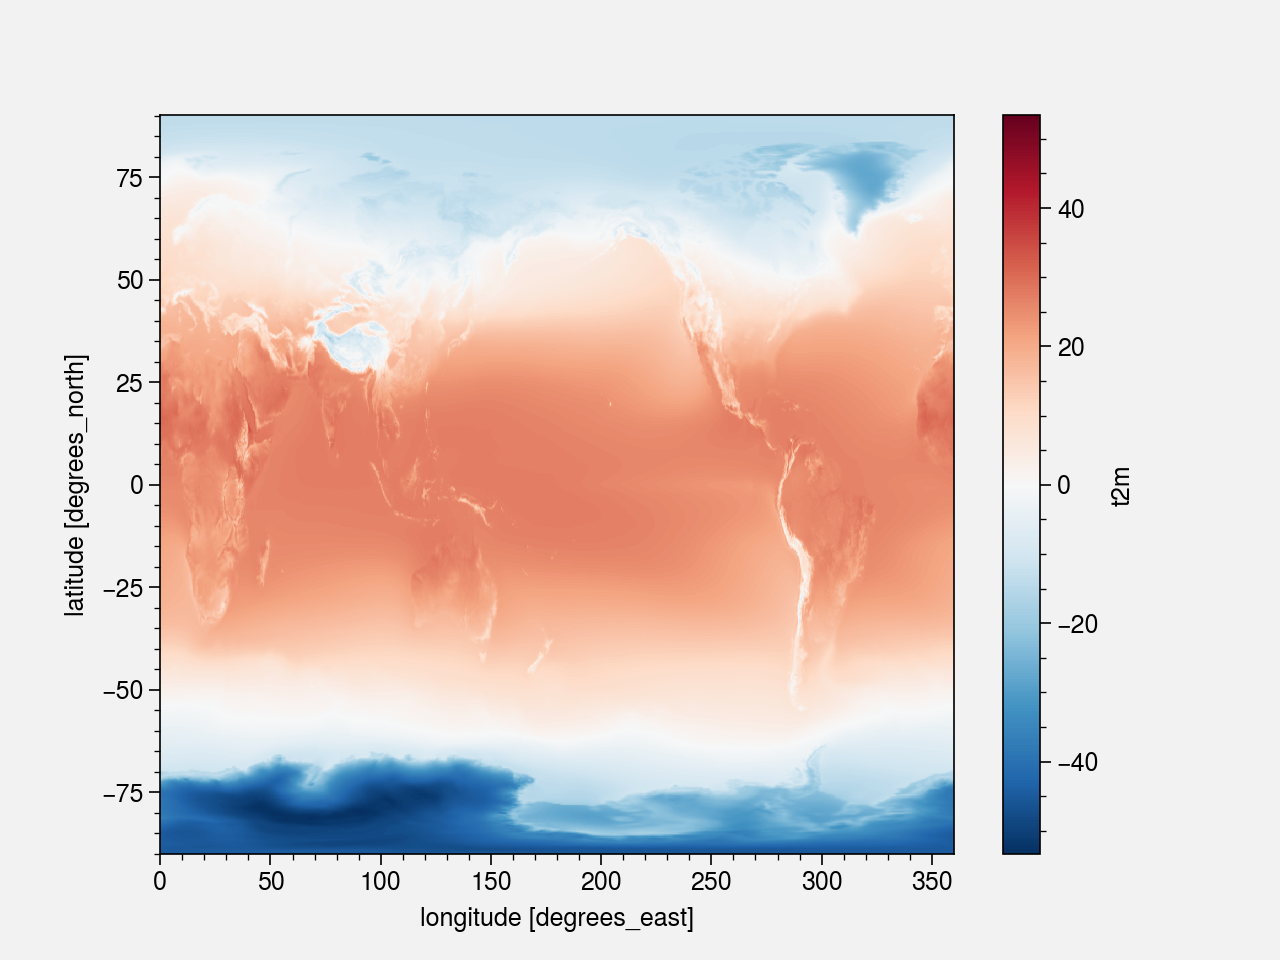

In [11]:
clim = da.mean('time').load()
clim.plot()

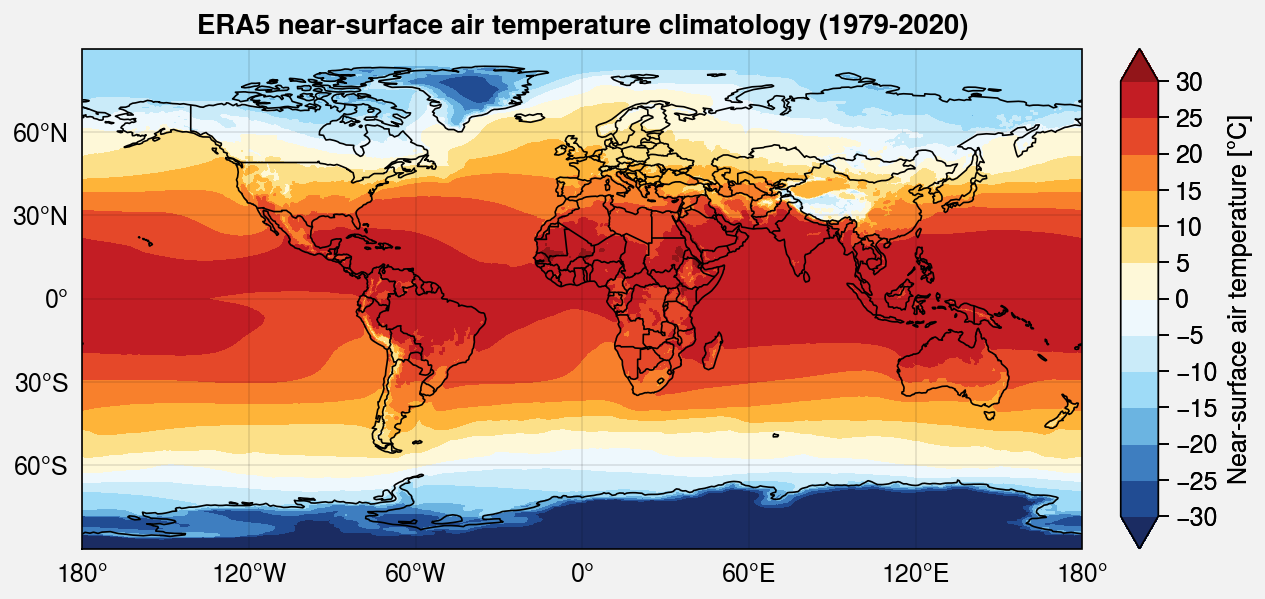

In [22]:
cmap='ColdHot'
levels=plot.arange(-30,30,5)
extend='both'

fig, axs = plot.subplots(nrows=1, ncols=1, proj='cyl', axwidth=5)

axs[0].contourf(clim, colorbar='r', cmap=cmap, levels=levels, extend=extend, colorbar_kw={'label': 'Near-surface air temperature [°C]'})

axs.format(
    labels=True, 
#     lonlines=10, latlines=5, 
#     latlim=(latlim.start, latlim.stop), lonlim=(lonlim.start, lonlim.stop),
    coast=True, 
#     ocean=True, oceancolor='gray3', 
    borders=True,
    suptitle='ERA5 near-surface air temperature climatology (1979-2020)'
)